<a href="https://colab.research.google.com/github/chirag3096/ExcelR-Assignment/blob/main/NNP_Forestfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
import seaborn as sns
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Activation,Layer,Lambda

In [170]:
data=pd.read_csv('/content/gas_turbines.csv')

In [171]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [172]:
Target = data['TEY']
data.drop(labels=['TEY'], axis=1,inplace = True)
data.insert(0, 'Y', Target)
data = data.rename({'Y':'TEY'}, axis = 1)

In [173]:
data.head()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEY     15039 non-null  float64
 1   AT      15039 non-null  float64
 2   AP      15039 non-null  float64
 3   AH      15039 non-null  float64
 4   AFDP    15039 non-null  float64
 5   GTEP    15039 non-null  float64
 6   TIT     15039 non-null  float64
 7   TAT     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [175]:
data.describe()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
count,15039.000000,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,134.188464,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,12.102353,1.972499,68.190934
std,15.829717,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,1.103196,2.222206,10.470586
min,100.170000,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,9.904400,0.000388,27.765000
25%,127.985000,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,11.622000,0.858055,61.303500
50%,133.780000,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,12.025000,1.390200,66.601000
75%,140.895000,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,12.578000,2.160400,73.935500
max,174.610000,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,15.081000,44.103000,119.890000


In [176]:
data.isnull().sum()

TEY     0
AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
dtype: int64

In [177]:
data.corr()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
TEY,1.000000,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,0.988473,-0.541751,-0.102631
AT,-0.207495,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006
AP,0.146939,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744
AH,-0.110272,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061
AFDP,0.717995,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299
GTEP,0.977042,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496
TIT,0.891587,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636
TAT,-0.720356,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888
CDP,0.988473,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103
CO,-0.541751,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743


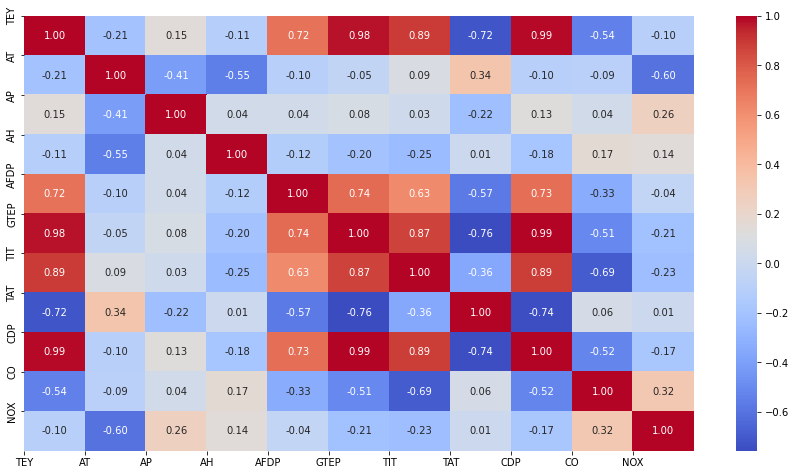

In [178]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


In [179]:
X = data.iloc[:,1:]
y = data.iloc[:,0]



In [180]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


Feature 0: 0.403331
Feature 1: 0.146443
Feature 2: 0.090978
Feature 3: 0.657095
Feature 4: 1.590728
Feature 5: 1.304544
Feature 6: 0.911180
Feature 7: 1.710731
Feature 8: 0.506675
Feature 9: 0.303267


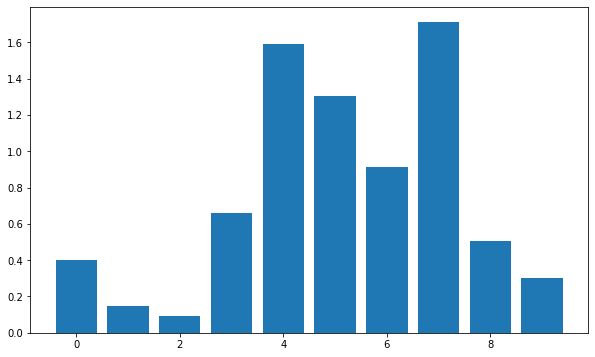

In [182]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [183]:
X = data.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)
y = data.iloc[:,0]
scaler=StandardScaler()

In [184]:
scaler.fit(X)

StandardScaler()

In [185]:
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0]
scaled_features=scaler.transform(X)


In [186]:
data_head=pd.DataFrame(scaled_features,columns=X.columns)
data_head

,AFDP,GTEP,TIT,TAT,CDP
0,-0.921232,-1.379101,-1.488376,0.585240,-1.357331
1,-0.921495,-1.363528,-1.482325,0.585240,-1.363676
2,-0.944385,-1.351309,-1.476275,0.568715,-1.360957
3,-0.946884,-1.348194,-1.464173,0.583969,-1.356424
4,-0.924389,-1.354663,-1.458123,0.582698,-1.350985
...,...,...,...,...,...
15034,-0.865850,-1.498657,-2.063184,0.103453,-1.543161
15035,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247
15036,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922
15037,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598


In [187]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [188]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (10527, 5)
Shape of x_test:  (4512, 5)
Shape of y_train:  (10527,)
Shape of y_test:  (4512,)


In [189]:
model = Sequential()
model.add(Dense(10, input_dim=5, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(6, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

In [190]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [191]:
model.fit(x_train,y_train, epochs=150, batch_size=40)

Epoch 1/150
264/264 [==============================] - 1s 2ms/step - loss: 0.6119 - mse: 0.6119
Epoch 2/150
264/264 [==============================] - 0s 1ms/step - loss: 0.3860 - mse: 0.3860
Epoch 3/150
264/264 [==============================] - 0s 2ms/step - loss: 0.3715 - mse: 0.3715
Epoch 4/150
264/264 [==============================] - 0s 2ms/step - loss: 0.3701 - mse: 0.3701
Epoch 5/150
264/264 [==============================] - 0s 1ms/step - loss: 0.3708 - mse: 0.3708
Epoch 6/150
264/264 [==============================] - 0s 2ms/step - loss: 0.3705 - mse: 0.3705
Epoch 7/150
264/264 [==============================] - 0s 2ms/step - loss: 0.3714 - mse: 0.3714
Epoch 8/150
264/264 [==============================] - 0s 2ms/step - loss: 0.3714 - mse: 0.3714
Epoch 9/150
264/264 [==============================] - 0s 2ms/step - loss: 0.3697 - mse: 0.3697
Epoch 10/150
264/264 [==============================] - 0s 1ms/step - loss: 0.3719 - mse: 0.3719
Epoch 11/150
264/264 [=================

In [192]:
scores = model.evaluate(x_test, y_test)
print((model.metrics_names[1]))

141/141 [==============================] - 0s 1ms/step - loss: 0.4102 - mse: 0.4102
mse
